Import

In [1]:
from google.colab import files # Import the 'files' module from Google Colab, which allows file uploads/downloads.
import io # Import the 'io' module for working with streams of data.
import pandas as pd # Import the 'pandas' library and rename it as 'pd' for data manipulation and analysis.
import plotly.express as px # Import the 'plotly.express' module and rename it as 'px' for data visualization.
import string # Import the 'string' module for string-related operations.
import nltk # NLTK is a leading platform for building Python programs to work with human language data
from nltk.tokenize import word_tokenize # used for parsing a large amount of textual data into parts to perform an analysis of the character of the text
from nltk.stem import WordNetLemmatizer # Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item
from collections import Counter # Import the 'Counter' class for counting items in collections.

wordnet_lemmatizer = WordNetLemmatizer() # Create an instance of the WordNetLemmatizer for word lemmatization.
pd.set_option("display.max_columns", None) # Set a Pandas option to display all columns in DataFrames.

In [2]:
nltk.download('punkt') # Download NLTK data for sentence tokenization.
nltk.download('stopwords') # Download NLTK data for common stopwords used in NLP.
nltk.download('wordnet') # Download WordNet data for word lemmatization.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Functions

In [3]:
def tokens_to_sentence(text):  # Function to convert a list of tokens into a sentence.
    return ' '.join(text)

def remove_punctuation(text):  # Function to remove punctuation from a list of tokens.
    no_punct=[w for w in text if w not in string.punctuation] # Create a list without punctuation characters.
    words_wo_punct=''.join(no_punct) # Join the list of words without punctuation back into a string.
    return words_wo_punct

def tokenize_text(text): # Function to tokenize a text into a list of words.
    return word_tokenize(text)

def lower_case(text): # Function to convert all words to lowercase in a list of tokens.
    return [w.lower() for w in text]

def remove_stopwords(text): # Function to remove stopwords from a list of tokens.
    stopword = nltk.corpus.stopwords.words('english') # Get a list of English stopwords from NLTK.
    return [w for w in text if w not in stopword] # Remove stopwords from the list of tokens.

def lemmatize_text(text): # Function to lemmatize words in a list of tokens (specifically verbs in this case).
    return [wordnet_lemmatizer.lemmatize(w, pos="v") for w in text] # Lemmatize each word in the list, considering them as verbs ("pos='v'").

In [4]:
def hard_code_labels(df, distressed_keywords, remodeled_keywords): # Function to hard code labels in a DataFrame based on keywords.
    distressed_label_list = []
    for d in df['norm_desc'].tolist(): # Iterate through the 'norm_desc' column in the DataFrame.
        distressed_opt = "none"
        for w in distressed_keywords: # Check if any distressed keywords are present in the description.
            if w in d:
                distressed_opt = "distressed"
                break

        if distressed_opt == "none": # If no distressed keywords found, check for remodeled keywords.
            for w in remodeled_keywords:
                if w in d:
                    distressed_opt = "not-distressed"
                    break
        distressed_label_list.append(distressed_opt) # Append the determined label to the 'distressed_label_list'.

    df['human_label'] = distressed_label_list # Add the 'label' column to the DataFrame with the determined labels.
    #df['label'] = distressed_label_list # Add the 'label' column to the DataFrame with the determined labels.
    return df  # Return the DataFrame with labels.

Data

In [5]:
# Upload a file in a Google Colab environment and store it in the 'uploaded' variable.
#Set1_Working.csv
# Set1_Working.csv File Upload
uploaded = files.upload()

Saving Set1_Working.csv to Set1_Working.csv


In [6]:
# transform file into pandas dataframe
_df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]])) # Read the uploaded file using Pandas, which is stored as bytes in 'uploaded'.
# _df = _df.sample(n=100, random_state=42)  # To take 100 random samples of the dataset from 23,638 datasets
print('Number of rows:', len(_df)) # Print the number of rows in the DataFrame.
print('Number of columns:', len(_df.columns)) # Print the number of columns in the DataFrame.
_df.head() # Display the first few rows of the DataFrame.

Number of rows: 12637
Number of columns: 7


,line,city,state_code,postal_code,property_id,rdc_web_url,Description
0,3705 7th Ave,Birmingham,AL,35224,M7358062309,https://www.realtor.com/realestateandhomes-det...,Calling All Investors!! Home sold AS IS This i...
1,1148 1st St N,Birmingham,AL,35204,M7067072160,https://www.realtor.com/realestateandhomes-det...,Solid investment property with great bones and...
2,1229 15th Way SW,Birmingham,AL,35211,M7396479920,https://www.realtor.com/realestateandhomes-det...,Investment property currently rented at $795 p...
3,426 80th St S,Birmingham,AL,35206,M8264613223,https://www.realtor.com/realestateandhomes-det...,This 4 sides brick home is the ideal investmen...
4,914 Knoxville Pl,Birmingham,AL,35224,M7604129328,https://www.realtor.com/realestateandhomes-det...,Don't miss out on this four sided brick home! ...


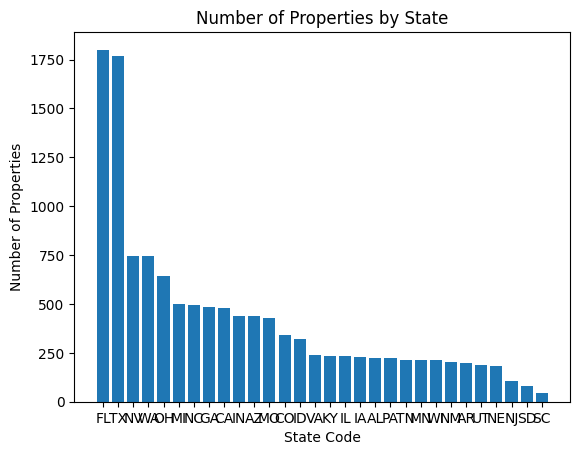

In [7]:
# @title Number of Properties by State

import matplotlib.pyplot as plt

state_counts = _df['state_code'].value_counts()

plt.bar(state_counts.index, state_counts.values)
plt.xlabel('State Code')
plt.ylabel('Number of Properties')
_ = plt.title('Number of Properties by State')

In [8]:
# Create a copy of the original dataset stored in '_df' and assign it to 'df'.
df = _df.copy()

# Apply a series of text normalization functions to the 'Description' column in the DataFrame 'df'.
df['norm_desc'] = df['Description'].apply(lambda x: remove_punctuation(str(x))) # Remove punctuation from the 'Description' column and store it in 'norm_desc'.
df['norm_desc'] = df['norm_desc'].apply(lambda x: tokenize_text(x)) # Tokenize the 'norm_desc' column into a list of words.
df['norm_desc'] = df['norm_desc'].apply(lambda x: lower_case(x)) # Convert all words to lowercase in the 'norm_desc' column.
df['norm_desc'] = df['norm_desc'].apply(lambda x: remove_stopwords(x)) # Remove stopwords from the 'norm_desc' column.
df['norm_desc'] = df['norm_desc'].apply(lambda x: lemmatize_text(x)) # Lemmatize words in the 'norm_desc' column, treating them as verbs.
df['norm_desc'] = df['norm_desc'].apply(lambda x: tokens_to_sentence(x)) # Convert the list of tokens in 'norm_desc' back into a sentence.
df.head() # Display the first few rows of the DataFrame 'df' after text normalization.

,line,city,state_code,postal_code,property_id,rdc_web_url,Description,norm_desc
0,3705 7th Ave,Birmingham,AL,35224,M7358062309,https://www.realtor.com/realestateandhomes-det...,Calling All Investors!! Home sold AS IS This i...,call investors home sell nice split level home...
1,1148 1st St N,Birmingham,AL,35204,M7067072160,https://www.realtor.com/realestateandhomes-det...,Solid investment property with great bones and...,solid investment property great bone fantastic...
2,1229 15th Way SW,Birmingham,AL,35211,M7396479920,https://www.realtor.com/realestateandhomes-det...,Investment property currently rented at $795 p...,investment property currently rent 795 per mon...
3,426 80th St S,Birmingham,AL,35206,M8264613223,https://www.realtor.com/realestateandhomes-det...,This 4 sides brick home is the ideal investmen...,4 side brick home ideal investment property wh...
4,914 Knoxville Pl,Birmingham,AL,35224,M7604129328,https://www.realtor.com/realestateandhomes-det...,Don't miss out on this four sided brick home! ...,dont miss four side brick home home would grea...


In [9]:
# prompt: show me the first 10 rows of columns Description and norm_desc in table format

# Display the first 10 rows of the 'Description' and 'norm_desc' columns in a table format.
print(df[['Description', 'norm_desc']].head(10))


                                         Description  \
0  Calling All Investors!! Home sold AS IS This i...   
1  Solid investment property with great bones and...   
2  Investment property currently rented at $795 p...   
3  This 4 sides brick home is the ideal investmen...   
4  Don't miss out on this four sided brick home! ...   
5  Great rental property or beginner home! Corner...   
6  Little Darling has 3 bedrooms, 1 full bath and...   
7  3 bedrooms 2 bath with a extra lot. Walk in th...   
8  You must see this 3 bedroom 1 bathroom home. A...   
9  Investors: looking for a quiet house to conver...   

                                           norm_desc  
0  call investors home sell nice split level home...  
1  solid investment property great bone fantastic...  
2  investment property currently rent 795 per mon...  
3  4 side brick home ideal investment property wh...  
4  dont miss four side brick home home would grea...  
5  great rental property beginner home corner lot... 

In [10]:
# view top words
full_text = ' '.join(s for s in df['norm_desc'].to_list())
full_text_split = full_text.split(' ')
word_counts = Counter(full_text_split)
df_word_counts = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
df_word_counts.columns = ['word', 'count']
df_word_counts.sort_values(by=['count'], ascending=False).head(50)

,word,count
2,home,19893
66,new,12393
34,room,9664
133,floor,8493
39,kitchen,7692
117,bath,6379
32,large,6223
105,2,6152
120,bedroom,5821
9,great,5544


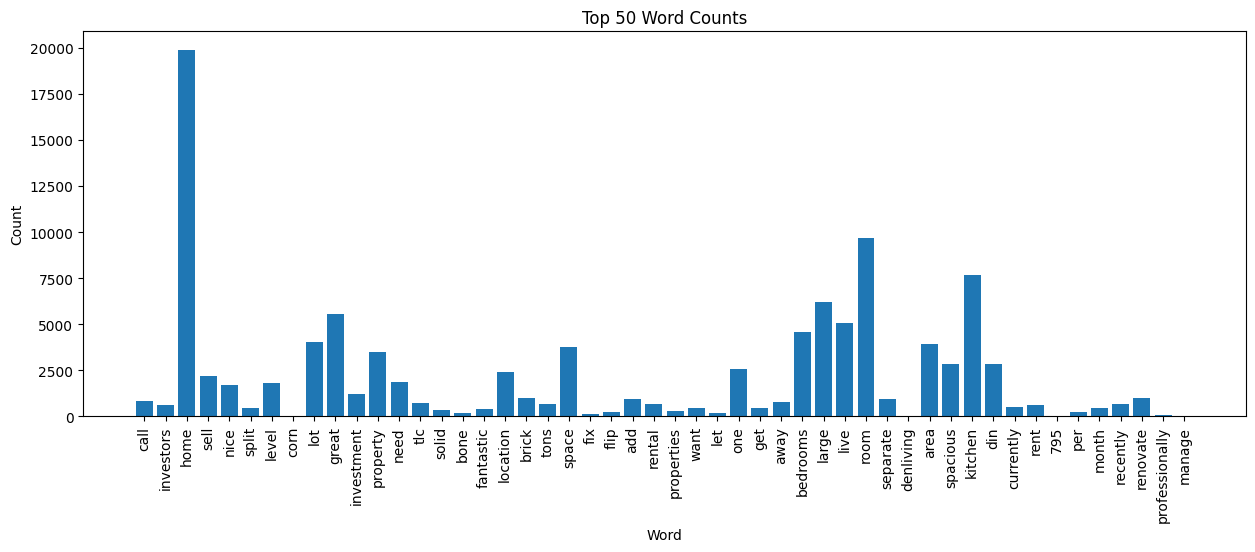

In [11]:
#  word count in the form of histogram on Y axis

import matplotlib.pyplot as plt
from collections import Counter

# Assuming df_word_counts is already created as in the preceding code
plt.figure(figsize=(15, 5))
plt.bar(df_word_counts['word'].head(50), df_word_counts['count'].head(50))
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 50 Word Counts')
plt.show()


from matplotlib import pyplot as plt
df_word_counts['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
# bottom 10
df_word_counts.sort_values(by=['count'], ascending=False).tail(20)

,word,count
11831,lauindry,1
11828,markethyvee,1
11802,roomdrop,1
11827,smokey,1
11805,130k,1
11806,doheny,1
11808,bakerycoffee,1
11809,officeentertainment,1
11810,kitchencabinets,1
11811,sdm,1


Filter on Dataset

Preliminary Labels

In [13]:
distressed_keywords = ['tlc', 'asis', 'investor', 'investment', 'repairs', 'opportunity',
                       'potential', 'cash', 'fixer upper', 'handyman', 'unfinished', 'vrbo',
                       'airbnb', 'cosmetic', 'fix flip', 'tenant', 'rehab', 'income produce',
                       'rental', 'rent', 'tenant', 'repair', 'must sell', 'quick sell'
                       ]
remodeled_keywords = ['update', 'new', 'upgrade', 'beautiful', 'love', 'reno', 'movein ready',
                      'gorgeous', 'nice', 'maintained', 'clean', 'adorable', 'remarkable',
                      'granite', 'quartz', 'well maintain', 'moveinready', 'redone', 'remodel',
                      'home ready', 'well keep', 'stainless', 'island', 'hardwood', 'move ready',
                      'entertain', 'charm']

In [14]:

df_label = hard_code_labels(df, distressed_keywords, remodeled_keywords)
df_label.head(50)

,line,city,state_code,postal_code,property_id,rdc_web_url,Description,norm_desc,human_label
0,3705 7th Ave,Birmingham,AL,35224,M7358062309,https://www.realtor.com/realestateandhomes-det...,Calling All Investors!! Home sold AS IS This i...,call investors home sell nice split level home...,distressed
1,1148 1st St N,Birmingham,AL,35204,M7067072160,https://www.realtor.com/realestateandhomes-det...,Solid investment property with great bones and...,solid investment property great bone fantastic...,distressed
2,1229 15th Way SW,Birmingham,AL,35211,M7396479920,https://www.realtor.com/realestateandhomes-det...,Investment property currently rented at $795 p...,investment property currently rent 795 per mon...,distressed
3,426 80th St S,Birmingham,AL,35206,M8264613223,https://www.realtor.com/realestateandhomes-det...,This 4 sides brick home is the ideal investmen...,4 side brick home ideal investment property wh...,distressed
4,914 Knoxville Pl,Birmingham,AL,35224,M7604129328,https://www.realtor.com/realestateandhomes-det...,Don't miss out on this four sided brick home! ...,dont miss four side brick home home would grea...,distressed
5,4801 Avenue S,Birmingham,AL,35208,M7225533245,https://www.realtor.com/realestateandhomes-det...,Great rental property or beginner home! Corner...,great rental property beginner home corner lot...,distressed
6,218 8th Ave S,Birmingham,AL,35205,M8096509705,https://www.realtor.com/realestateandhomes-det...,"Little Darling has 3 bedrooms, 1 full bath and...",little darling 3 bedrooms 1 full bath half bat...,distressed
7,2325 Beulah Ave SW,Birmingham,AL,35211,M8690271115,https://www.realtor.com/realestateandhomes-det...,3 bedrooms 2 bath with a extra lot. Walk in th...,3 bedrooms 2 bath extra lot walk live room fir...,distressed
8,5773 King Dr,Birmingham,AL,35228,M7760537637,https://www.realtor.com/realestateandhomes-det...,You must see this 3 bedroom 1 bathroom home. A...,must see 3 bedroom 1 bathroom home need tlc ca...,distressed
9,720 12th Ct W,Birmingham,AL,35204,M8549559991,https://www.realtor.com/realestateandhomes-det...,Investors: looking for a quiet house to conver...,investors look quiet house convert business pl...,distressed


In [15]:
# prompt: Create the new data frame that removes the columns - line, city, state_code, property_id, rdc_web_url

new_df = df_label.drop(['line', 'city', 'state_code', 'property_id', 'rdc_web_url', 'postal_code'], axis=1)
new_df

,Description,norm_desc,human_label
0,Calling All Investors!! Home sold AS IS This i...,call investors home sell nice split level home...,distressed
1,Solid investment property with great bones and...,solid investment property great bone fantastic...,distressed
2,Investment property currently rented at $795 p...,investment property currently rent 795 per mon...,distressed
3,This 4 sides brick home is the ideal investmen...,4 side brick home ideal investment property wh...,distressed
4,Don't miss out on this four sided brick home! ...,dont miss four side brick home home would grea...,distressed
...,...,...,...
12632,back on market. Classic 1940's cape cod waitin...,back market classic 1940s cape cod wait bring ...,distressed
12633,Don't miss out on this opportunity! Solid home...,dont miss opportunity solid home great neighbo...,distressed
12634,"Run, don't walk to this one owner, custom buil...",run dont walk one owner custom build ranch des...,distressed
12635,Opportunity awaits! With some TLC this 2 bedro...,opportunity await tlc 2 bedroom 2 bathroom eas...,distressed


In [16]:
# prompt: Export the output dataframe into csv file in the path Desktop\Pavithra\Masters_Project

from google.colab import files

# Assuming df_label is your DataFrame
df_label.to_csv('output.csv', encoding='utf-8', index=False)
files.download('output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

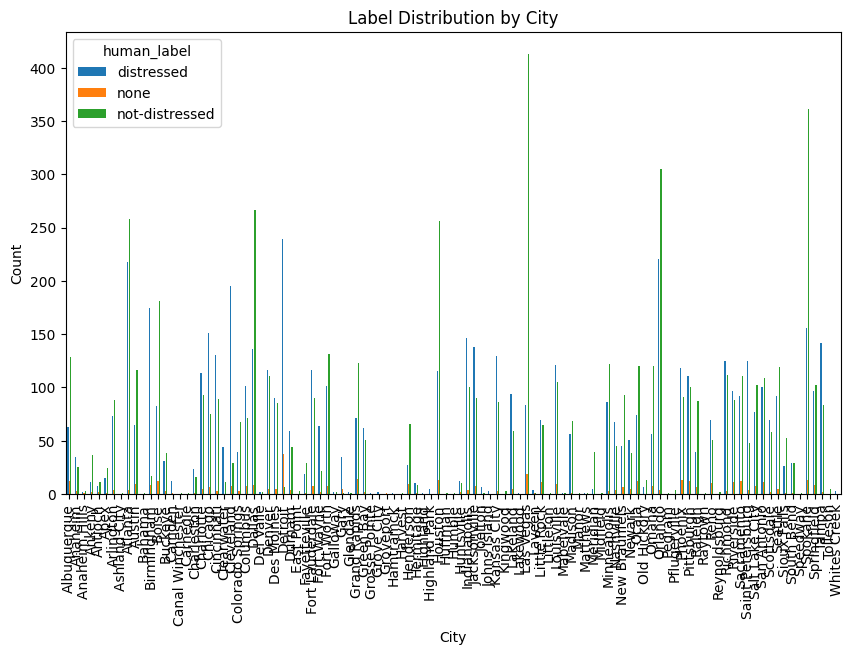

In [18]:
# @title Label Distribution by City

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame named 'df_label'
label_counts = df_label.groupby(['city', 'human_label'])['human_label'].count().unstack()

label_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Count')
_ = plt.title('Label Distribution by City')

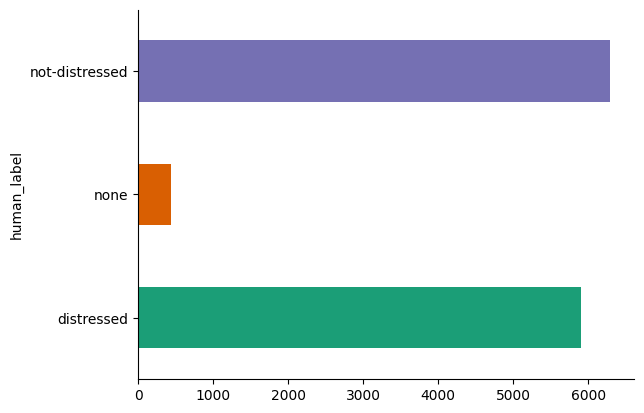

In [20]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df_label.groupby('human_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Distressed

In [21]:
# iterate through those are distressed
i = 1
for d in df_label.loc[df_label['human_label'] == "distressed"]['norm_desc'].tolist()[:500]:
    print('{0}) {1}\n'.format(i, d))
    i += 1

1) call investors home sell nice split level home corn lot home great investment property need tlc

2) solid investment property great bone fantastic location brick home tons space fix flip add rental properties want let one get away bedrooms large live room separate denliving area spacious kitchen separate din area

3) investment property currently rent 795 per month recently renovate professionally manage terrific street step right cashflow lease run january 48hr notice require show

4) 4 side brick home ideal investment property whether new investment world season veteran property cash flow tenant place immediate expenditures necessary market area hot ripe run number take advantage deal today

5) dont miss four side brick home home would great investor 3 lot little tlc could make sell two wood burn fireplaces life time metal roof two additional bedrooms spacious room laundry well 2 additional lot large yard outside entertainment make offer today

6) great rental property beginner ho

Non_Distressed

In [22]:
# iterate through those not destressed
i = 1
for d in df_label.loc[df_label['human_label'] == "not-distressed"]['norm_desc'].tolist()[:100]:
    print('{0}) {1}\n'.format(i, d))
    i += 1

1) call impressive 3bedroom 2bath home sure go beyond expectations wellpresented home contain ceramic tile throughout whole house enter house greet large formal din room brick accent wall make way gorgeous kitchen cant help notice plenty cabinet space granite counter top large live area perfect entertainment include two glass slide doors lead screen patio allow enjoy morning coffee listen bird chirp make way back home notice bedrooms walkin closet master bed include master bath call private show today

2) newly remodel 4 bedroom 2 bathroom residence feature spacious bedrooms massive fence backyard brand new ac unit newly paint interiorexterior wall upgrade kitchen feature granite countertops handle property tile throwout property also large utility room washer dryer extra storage space well shed backyard

3) fully renovate home beautiful home offer 4 bedroom 2 bathrooms inside offer beautiful wood cabinet kitchen granite countertop stainless steel appliances spacious bedrooms live room

None

In [23]:
# iterate through those not destressed
i = 1
for d in df_label.loc[df_label['human_label'] == "none"]['norm_desc'].tolist()[:100]:
    print('{0}) {1}\n'.format(i, d))
    i += 1

1) incredible home perfectly locate close everything

2) cute home quiet neighborhood large backyard cover patio locate couldesac

3) presold

4) presold

5) centrally locate 3 bedroom 2 bathroom single level home 14 acre hoas home 1719 square feet surround mature tree cover patio wood burn fireplace 95 gas furnace ac unit gas range cooktop dishwasher microwave disposal fresh paint inside

6) must see appreciate

7) perfect location perfect price home wont last long fresh paint throughout laundry room wonderful front porch area morning coffee huge flat backyard perfect mix sun shade paint wood floor carpet replace close

8) three bedrooms one full bath seller tax certificate receive tax deed may 2022 purchaser must clear title desire

9) 3 bedrooms 2 bath live roomdining room combo kitchen laundry room basement one car garage

10) look great deal lot room well look property live room din room den kitchen 4 bedrooms 2 full bath wait special touch make buyer perform due diligence prior s